In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ds = pd.read_csv('iris.csv')

In [6]:
ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
X = ds.iloc[:,:-1].values
Y = ds.iloc[:,-1].values

In [8]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [14]:
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [18]:
Y = ct.fit_transform(Y.reshape(len(Y),1))

In [20]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
Xtrain,Xtest,Ytrain,Ytest = tts(X,Y,test_size=0.2,random_state = 42)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
classifierDTC = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [25]:
classifierDTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
YpredDTC = classifierDTC.predict(Xtest)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [35]:
print(np.concatenate((YpredDTC,Ytest),axis=1))

[[0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0.]]


1.0

In [45]:
print(f'accuracy_score: {accuracy_score(Ytest,YpredDTC)}')
print(classification_report(Ytest,YpredDTC))

accuracy_score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



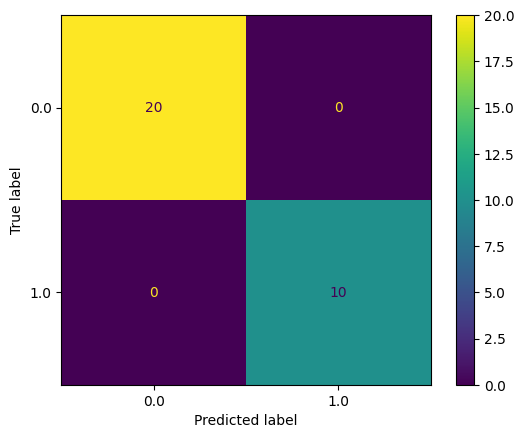

In [40]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,0],YpredDTC[:,0])

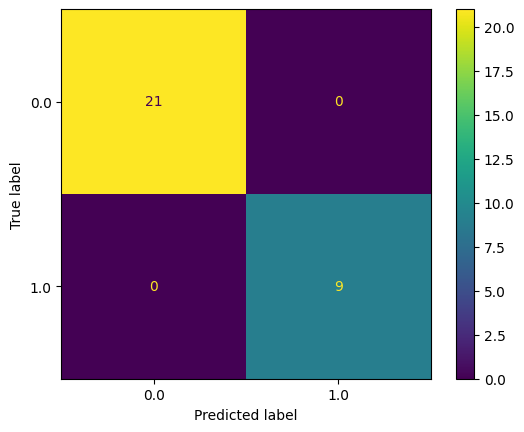

In [41]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,1],YpredDTC[:,1])

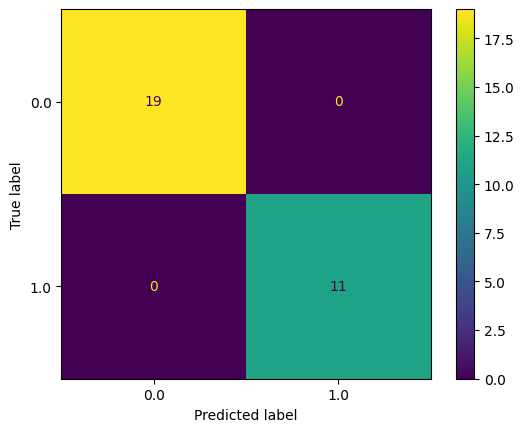

In [42]:
ConfusionMatrixDisplay.from_predictions(Ytest[:,2],YpredDTC[:,2])